# Civic 311 Problem Set 
### 1. Problem :  How weather affect the illegal Parking?
### 2. Descriptive statistics
### 3. Visualization
### 4. Analysis
### 5. Discussion


writer : ChunChieh Tsai

## 1. Problem : How weather affect the illegal Parking?



## 2. Problem : Descriptive Statistics




## 3. Problem : Visualiztion




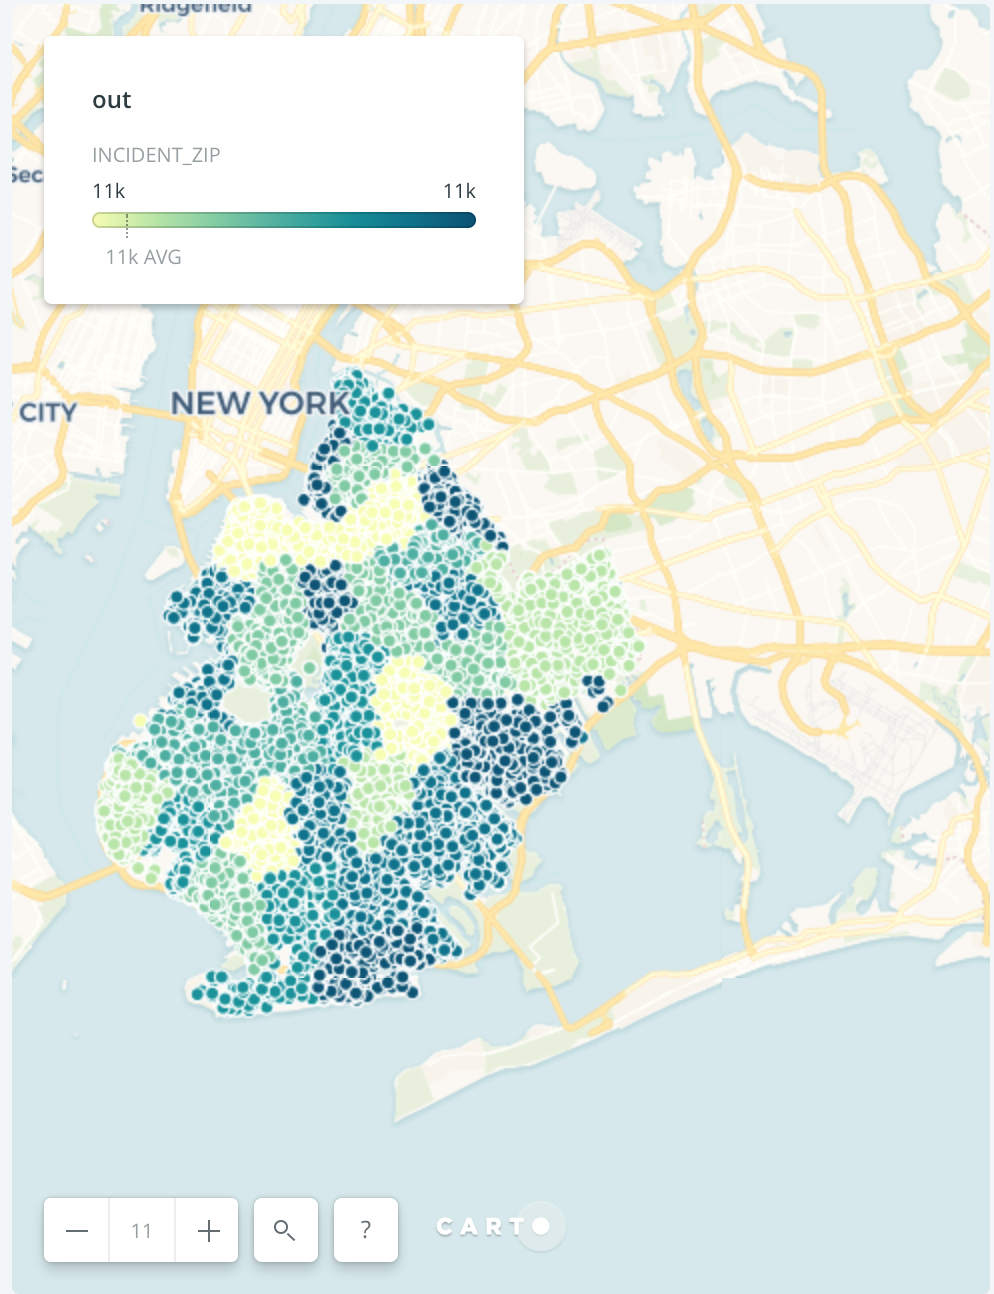

In [51]:
from IPython.display import Image
Image("map.png", width=800, height=1200)

## 4.Analysis

### Result: 
After analyzing the weather and 311 data, I found the correlation between them is low, from -0.015533 to 0.127560.


### Methology
***1. Weather Data Collect***

I perform Extract, Tranform and Load(ETL) to get usable weather data for this data set. 
I crawled through the daily weather data from ‘Weather Underground’, and clean it to csv.
Python script I wrote: https://github.com/DishT/Civic-Analysis/blob/master/Month_weather_crawler.ipynb

***2. Choose the target complain type***

After first explore the 311 csv file, I can see the top 3 complain type.
And I choose the "illegal parking" as the target, because the data is large enough to analyze.

***3. Merge the weather and complain dataframe***

To see the correlation between weather and complain, I have to merge the 2 dataframe first.
I set the date as "key", and the 2 dataframe will combine to 1 datafram based on date.

***4. Find the correaltion between the weather and complain data***

After I merge 2 dataframe, I start to find out the correlation between them.
However, it shows low correlation between then from tmperature to humidity.




## 5. Discussion

***
1. how an agency might use your findings to improve service delivery or performance. 
2. What agency(ies) would be involved? 
3. What are the limitations of your approach? 
4. What could you do to improve it?
***

First, the angency can know that tha weather can barely affect the "illegal parking". 
The limitation of my approach is the area I choose, because I only choose 1 borough as my dataset. It is limit data for me to analyze. On the other hand, it might initially no relation between "illegal parking" and "weather". The result proved the relation between them.

I can add the other 4 boroughs in the database, and run the correlation between illegal parking and weather, besieds, and I can run linear regression for each boroughs.

### 2.1 Import modules

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.formula.api as smf
import seaborn as sns

% matplotlib inline

### 2.2 read the csv file

In [3]:
df = pd.read_csv("311_Service_Requests_2016.csv")
df.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8,17,40,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32665128,02/13/2016 01:45:21 PM,09/27/2017 03:23:32 PM,DOT,Department of Transportation,Street Condition,"Rough, Pitted or Cracked Roads",Street,11214,2833 HARWAY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.588154,-73.984925,"(40.58815365032787, -73.98492507591749)"
1,32557686,01/28/2016 09:10:41 PM,07/12/2017 12:00:00 AM,DOB,Department of Buildings,Building/Use,Zoning - Non-Conforming/Illegal Vehicle Storage,NaN,11234,2265 EAST 73 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618142,-73.903087,"(40.61814186182378, -73.90308738267184)"
2,34177953,08/26/2016 11:58:00 AM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11215,211 9 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670943,-73.989921,"(40.67094251841431, -73.98992075323933)"
3,34605734,10/23/2016 01:11:40 PM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11215,211A 9 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670943,-73.989921,"(40.67094251841431, -73.98992075323933)"
4,35002194,12/13/2016 09:26:48 AM,09/27/2017 04:19:58 PM,DOT,Department of Transportation,Street Condition,"Rough, Pitted or Cracked Roads",Street,11203,MIDWOOD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661180,-73.933835,"(40.66117996968625, -73.9338348814084)"


### 2.3 Intial Chek the data by info(), describe(), value_counts()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701245 entries, 0 to 701244
Data columns (total 53 columns):
Unique Key                        701245 non-null int64
Created Date                      701245 non-null object
Closed Date                       683197 non-null object
Agency                            701245 non-null object
Agency Name                       701245 non-null object
Complaint Type                    701245 non-null object
Descriptor                        694335 non-null object
Location Type                     558098 non-null object
Incident Zip                      686543 non-null object
Incident Address                  596034 non-null object
Street Name                       596024 non-null object
Cross Street 1                    372882 non-null object
Cross Street 2                    371309 non-null object
Intersection Street 1             88356 non-null object
Intersection Street 2             88259 non-null object
Address Type                      693

In [5]:
df.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Ferry Direction,Latitude,Longitude
count,7.012450e+05,6.681560e+05,668156.000000,0.0,0.0,668156.000000,668156.000000
mean,3.373333e+07,9.973842e+05,178540.365545,NaN,NaN,40.656713,-73.952657
std,8.149362e+05,1.003618e+04,12872.780854,NaN,NaN,0.035329,0.036177
min,3.230509e+07,9.727760e+05,147559.000000,NaN,NaN,40.571691,-74.041335
25%,3.303077e+07,9.904540e+05,169605.000000,NaN,NaN,40.632189,-73.977641
50%,3.373142e+07,9.970870e+05,180066.000000,NaN,NaN,40.660899,-73.953730
75%,3.443850e+07,1.003962e+06,188217.000000,NaN,NaN,40.683269,-73.928951
max,3.719537e+07,1.024920e+06,208618.000000,NaN,NaN,40.739275,-73.853413


In [52]:
df["Complaint Type"].value_counts().head()

HEAT/HOT WATER          69301
Noise - Residential     68199
Illegal Parking         45943
Blocked Driveway        43206
UNSANITARY CONDITION    26967
Name: Complaint Type, dtype: int64

### 2.4 Choose the illegal Parking

In [7]:
df_park = df[df["Complaint Type"] == "Illegal Parking"]
len(df_park)

45943

In [38]:
df_park.to_csv('out.csv')

In [9]:
def remove_time(time):
    return time[:10]


In [10]:
pd.to_datetime(df_park["Created Date"], format='%m%d%Y', errors='ignore')
df_park["day"] = df["Created Date"].apply(remove_time)
df_park["Created Date"].head()
df_park["day"].head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


21     01/01/2016
22     01/01/2016
23     01/01/2016
71     01/01/2016
109    01/01/2016
Name: day, dtype: object

In [11]:
df_park

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,day
21,32305088,01/01/2016 01:53:26 AM,01/01/2016 03:10:29 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11219,974 52 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.637759,-74.001185,"(40.63775854553295, -74.00118541600322)",01/01/2016
22,32305086,01/01/2016 12:54:40 AM,01/01/2016 03:00:10 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11214,258 BAY 22 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.600597,-74.004818,"(40.60059671149098, -74.00481824870285)",01/01/2016
23,32305113,01/01/2016 01:59:26 AM,01/01/2016 03:43:28 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11212,249 LEGION STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.662519,-73.916702,"(40.662519270686566, -73.91670171181525)",01/01/2016
71,32306558,01/01/2016 12:39:14 AM,01/01/2016 03:30:52 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,550 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.638936,-73.975625,"(40.638936226331154, -73.97562467812924)",01/01/2016
109,32308010,01/01/2016 01:26:40 AM,01/01/2016 01:30:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11223,121 AVENUE V,...,NaN,NaN,NaN,NaN,NaN,NaN,40.594123,-73.979580,"(40.59412276435495, -73.97958023956112)",01/01/2016
122,32308648,01/01/2016 01:45:44 AM,01/01/2016 04:43:24 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11228,7024 15 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.620310,-74.000267,"(40.62030992633245, -74.00026655882402)",01/01/2016
124,32308688,01/01/2016 12:43:10 AM,01/01/2016 03:30:48 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,550 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.638936,-73.975625,"(40.638936226331154, -73.97562467812924)",01/01/2016
142,32309476,01/01/2016 01:40:15 AM,01/01/2016 01:53:55 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11228,1455 71 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.620549,-74.001671,"(40.62054871136993, -74.00167140184891)",01/01/2016
185,32310796,01/01/2016 08:07:48 AM,01/01/2016 09:08:26 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11223,1704 WEST 2 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.606021,-73.975460,"(40.606020655371275, -73.97546022840841)",01/01/2016
186,32310797,01/01/2016 08:21:09 PM,01/01/2016 09:34:34 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11204,1560 WEST 6 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.609175,-73.979918,"(40.60917529056423, -73.97991778225222)",01/01/2016


In [12]:
df_park_count = df_park

### 2.5 Group by date and count how many issues in each day

In [13]:
df_park_count = df_park_count.groupby("day").count()

In [14]:
df_park_count.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
day,,,,,,,,,,,,,,,,,,,,,
01/01/2016,73,73,73,73,73,73,73,73,73,70,...,0,0,0,0,0,0,0,73,73,73
01/02/2016,64,64,64,64,64,64,64,64,64,59,...,0,0,0,0,0,0,0,64,64,64
01/03/2016,113,113,113,113,113,113,113,113,113,103,...,0,0,0,0,0,0,0,112,112,112
01/04/2016,119,119,119,119,119,119,119,119,119,103,...,0,0,0,0,0,0,0,119,119,119
01/05/2016,118,118,118,118,118,118,118,118,118,97,...,0,0,0,0,0,0,0,118,118,118


In [31]:
df_park_count.reset_index(inplace=True)
df_park_count.head()

,index,day,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,0,01/01/2016,73,73,73,73,73,73,73,73,...,0,0,0,0,0,0,0,73,73,73
1,1,01/02/2016,64,64,64,64,64,64,64,64,...,0,0,0,0,0,0,0,64,64,64
2,2,01/03/2016,113,113,113,113,113,113,113,113,...,0,0,0,0,0,0,0,112,112,112
3,3,01/04/2016,119,119,119,119,119,119,119,119,...,0,0,0,0,0,0,0,119,119,119
4,4,01/05/2016,118,118,118,118,118,118,118,118,...,0,0,0,0,0,0,0,118,118,118


In [16]:
weather = pd.read_csv("2016monthlyweather.csv")

In [17]:
weather.head()
weather["day"] = weather["2016"]

### 2.6 Merge weather data and 311 data by date

In [18]:
df_all = pd.merge(weather,df_park_count)

In [19]:
df_all[df_all != 0].dropna(axis=1).head()

,2016,Temp.high,Temp.avg,Temp.low,Humidity (%)high,Humidity (%)avg,Humidity (%)low,Sea Level Press. (in)avg,Sea Level Press. (in)low,Visibility (mi)high,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,01/01/2016,42,38.0,34.0,59,52,44,30.03,29.97,10,...,73,73,73,73,73,73,73,73,73,73
1,01/02/2016,40,36.0,32.0,52,46,40,30.02,29.96,10,...,64,64,64,64,64,64,64,64,64,64
2,01/03/2016,45,40.0,35.0,56,47,37,29.86,29.79,10,...,113,113,113,113,113,113,113,112,112,112
3,01/04/2016,36,25.0,14.0,59,44,28,30.05,29.87,10,...,119,119,119,119,119,119,119,119,119,119
4,01/05/2016,29,20.0,11.0,58,41,24,30.57,30.46,10,...,118,118,118,118,118,118,118,118,118,118


In [20]:
df_all.columns

Index(['2016', 'Temp.high', 'Temp.avg', 'Temp.low', 'Dew Pointhigh',
       'Dew Pointavg', 'Dew Pointlow', 'Humidity (%)high', 'Humidity (%)avg',
       'Humidity (%)low', 'Sea Level Press. (in)high',
       'Sea Level Press. (in)avg', 'Sea Level Press. (in)low',
       'Visibility (mi)high', 'Visibility (mi)avg', 'Visibility (mi)low',
       'Wind (mph)high', 'Wind (mph)avg', 'Wind (mph)high.1',
       'Precip. (in)sum', 'day', 'Unique Key', 'Created Date', 'Closed Date',
       'Agency', 'Agency Name', 'Complaint Type', 'Descriptor',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park B

In [21]:
df_all.drop(['Created Date',
       'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude',
       'Longitude', 'Location'], axis=1, inplace=True)

In [22]:
df_all.head()

,2016,Temp.high,Temp.avg,Temp.low,Dew Pointhigh,Dew Pointavg,Dew Pointlow,Humidity (%)high,Humidity (%)avg,Humidity (%)low,...,Sea Level Press. (in)low,Visibility (mi)high,Visibility (mi)avg,Visibility (mi)low,Wind (mph)high,Wind (mph)avg,Wind (mph)high.1,Precip. (in)sum,day,Unique Key
0,01/01/2016,42,38.0,34.0,26.0,23,16,59,52,44,...,29.97,10,10,10,17,8,26,0,01/01/2016,73
1,01/02/2016,40,36.0,32.0,20.0,18,15,52,46,40,...,29.96,10,10,10,15,7,23,0,01/02/2016,64
2,01/03/2016,45,40.0,35.0,23.0,21,19,56,47,37,...,29.79,10,10,10,17,8,26,0,01/03/2016,113
3,01/04/2016,36,25.0,14.0,23.0,9,0,59,44,28,...,29.87,10,10,10,21,9,31,0,01/04/2016,119
4,01/05/2016,29,20.0,11.0,1.0,-3,-6,58,41,24,...,30.46,10,10,10,20,5,30,0,01/05/2016,118


### 2.7 Correlation

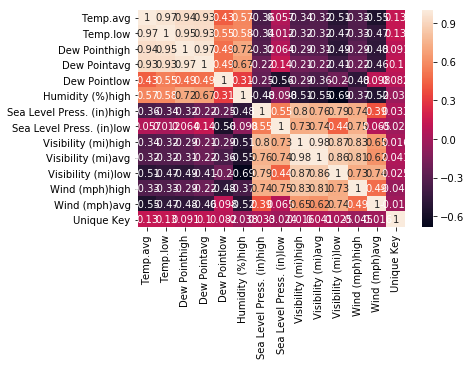

In [24]:
sns.heatmap(df_all.corr(),annot=True)

In [25]:
df_all.corr()

,Temp.avg,Temp.low,Dew Pointhigh,Dew Pointavg,Dew Pointlow,Humidity (%)high,Sea Level Press. (in)high,Sea Level Press. (in)low,Visibility (mi)high,Visibility (mi)avg,Visibility (mi)low,Wind (mph)high,Wind (mph)avg,Unique Key
Temp.avg,1.000000,0.970693,0.939538,0.933605,0.430507,0.572721,-0.359415,0.057390,-0.339984,-0.318253,-0.513536,-0.327626,-0.551879,0.127560
Temp.low,0.970693,1.000000,0.947541,0.934485,0.546961,0.582190,-0.336465,0.011527,-0.317321,-0.316478,-0.469385,-0.330682,-0.465156,0.128455
Dew Pointhigh,0.939538,0.947541,1.000000,0.972067,0.491433,0.716364,-0.323612,0.063503,-0.294635,-0.309126,-0.492980,-0.285311,-0.477674,0.090689
Dew Pointavg,0.933605,0.934485,0.972067,1.000000,0.490519,0.674434,-0.219082,0.135161,-0.205005,-0.224341,-0.412189,-0.222607,-0.460890,0.104759
Dew Pointlow,0.430507,0.546961,0.491433,0.490519,1.000000,0.313364,-0.245596,-0.559467,-0.289833,-0.355857,-0.200017,-0.475609,0.098189,0.082248
Humidity (%)high,0.572721,0.582190,0.716364,0.674434,0.313364,1.000000,-0.478983,-0.098249,-0.506582,-0.545985,-0.686175,-0.367868,-0.522246,-0.037880
Sea Level Press. (in)high,-0.359415,-0.336465,-0.323612,-0.219082,-0.245596,-0.478983,1.000000,0.545180,0.799808,0.755982,0.785721,0.735018,0.391357,0.033113
Sea Level Press. (in)low,0.057390,0.011527,0.063503,0.135161,-0.559467,-0.098249,0.545180,1.000000,0.725032,0.740959,0.444781,0.747248,0.065475,-0.024003
Visibility (mi)high,-0.339984,-0.317321,-0.294635,-0.205005,-0.289833,-0.506582,0.799808,0.725032,1.000000,0.975193,0.869638,0.829840,0.653522,0.016219
Visibility (mi)avg,-0.318253,-0.316478,-0.309126,-0.224341,-0.355857,-0.545985,0.755982,0.740959,0.975193,1.000000,0.861512,0.813776,0.618508,0.040522


In [28]:
df_all["log_Temp.avg"] = np.log(df_all[df_all["Temp.avg"]>0]["Temp.avg"])
df_all["log_Dew Pointhigh"] = np.log(df_all[df_all["Dew Pointhigh"]>0]["Dew Pointhigh"])
df_all["log_Unique Key"] = np.log(df_all[df_all["Unique Key"]>0]["Unique Key"])


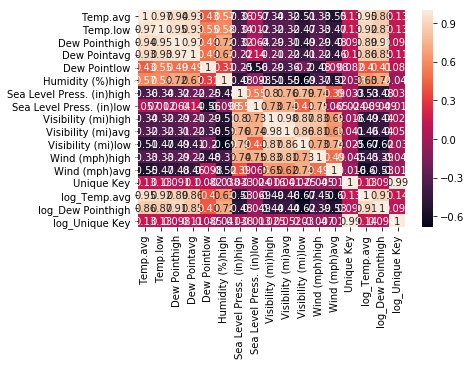

In [35]:
sns.heatmap(df_all.corr(),annot=True)

ValueError: max must be larger than min in range parameter.

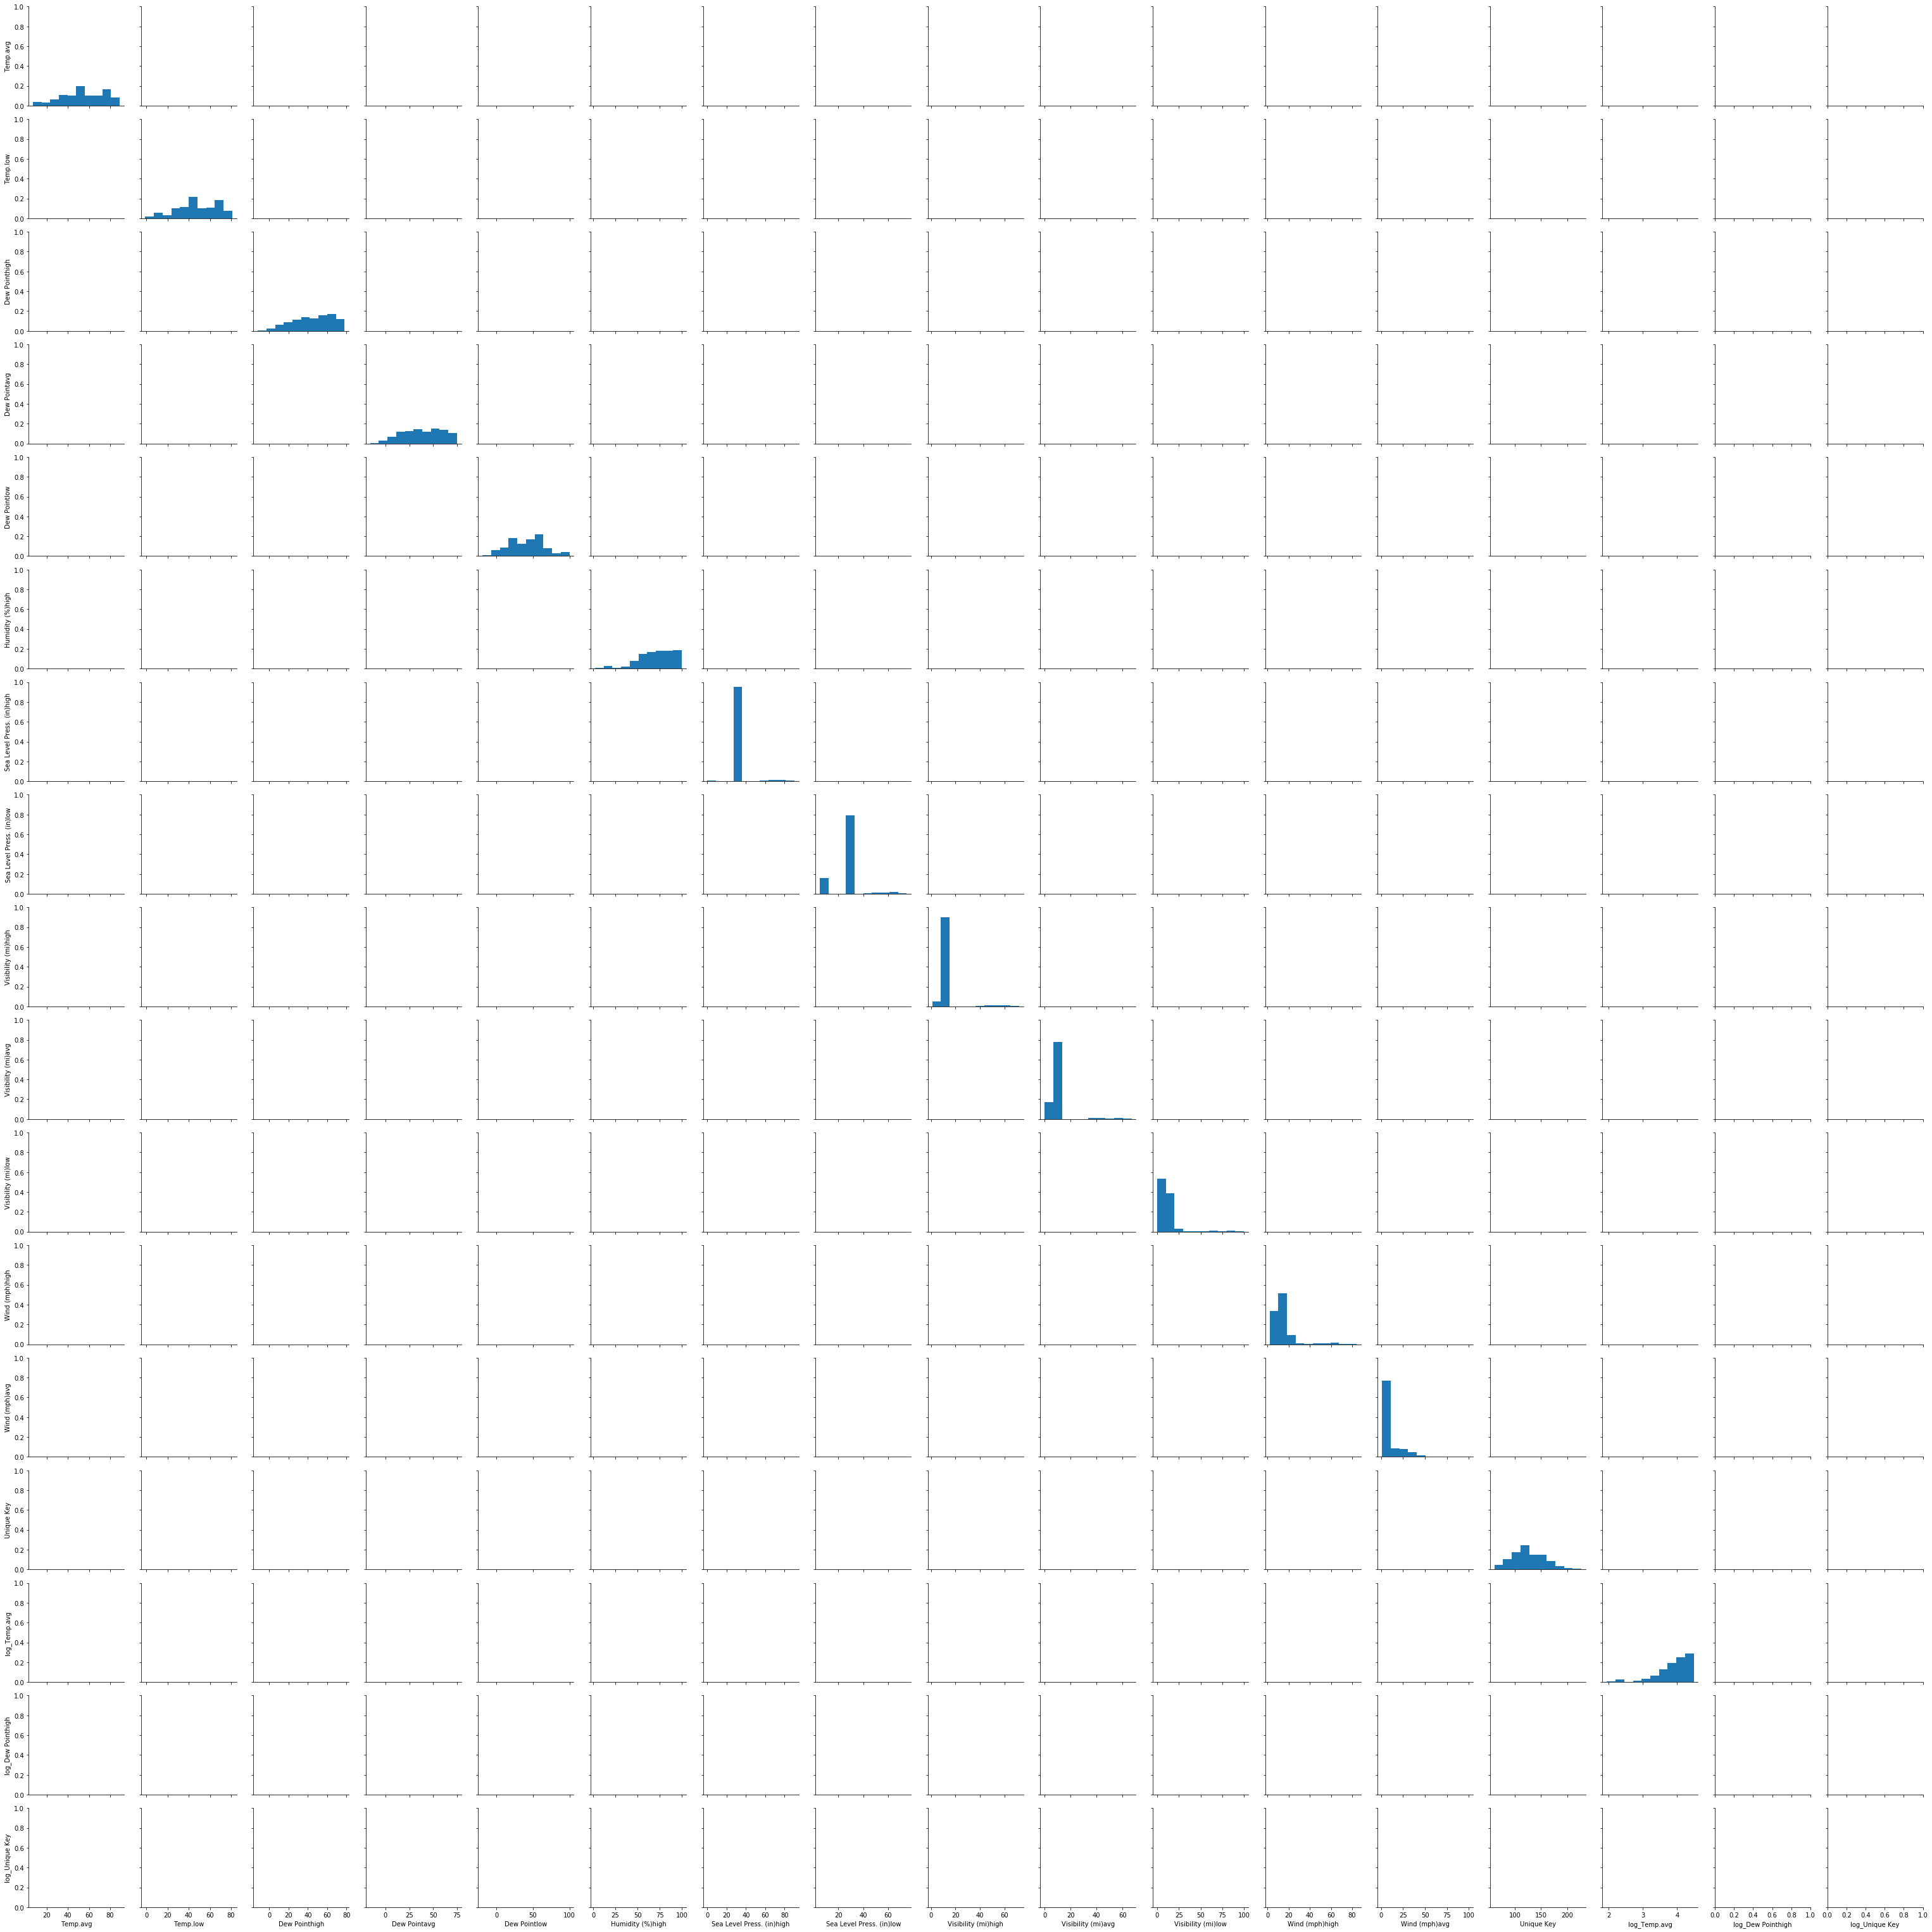

In [36]:
sns.pairplot(df_all)